# 引入必要的库

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori

-------

# 分析Wine Reviews数据集的winemag-data_first150k.csv'文件
## csv文件路径

In [2]:
csv_file_path = 'D:/Data/data_mining/1/Wine Reviews/winemag-data_first150k.csv'

## 读取数据，并查看前10行数据

In [3]:
data_frame = pd.read_csv(csv_file_path)
data_frame = data_frame.dropna(how='any').astype(str)
print(data_frame[:10])

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
8           8      US  This re-named vineyard was formerly bottled as...   
9           9      US  The producer sources from two blocks of the vi...   
11         11      US  From 18-year-old vines, this supple well-balan...   
12         12      US  A standout even in this terrific lineup of 201...   
14         14      US  With its sophisticated mix of mineral, acid an...   
15         15      US  First made in 2006, this succulent luscious Ch...   
16         16      US  This blockbuster, powerhouse of a wine suggest...   

                        designation points  price    province  \
0                 Martha's Vineyard     96  235.0  California   
2     Special Selected Late Harve

## 选择出标称属性对应的列

In [4]:
nominal_columns = [1, 3, 6, 7, 8, 9, 10]
data_frame = data_frame[[column for column in data_frame.columns[nominal_columns]]]

# 预处理成适合进行关联规则挖掘的形式

In [5]:
apriori_data = []
for _, data in data_frame.iterrows():
    apriori_data.append(data)
print(apriori_data[:10])

[country                        US
designation     Martha's Vineyard
province               California
region_1              Napa Valley
region_2                     Napa
variety        Cabernet Sauvignon
winery                      Heitz
Name: 0, dtype: object, country                                   US
designation    Special Selected Late Harvest
province                          California
region_1                      Knights Valley
region_2                              Sonoma
variety                      Sauvignon Blanc
winery                              Macauley
Name: 2, dtype: object, country                       US
designation              Reserve
province                  Oregon
region_1       Willamette Valley
region_2       Willamette Valley
variety               Pinot Noir
winery                     Ponzi
Name: 3, dtype: object, country                        US
designation                Silice
province                   Oregon
region_1       Chehalem Mountains
region_

## 设置显示的最大数目

In [6]:
max_visual_num = 30

# 频繁模式

In [7]:
item_sets, rules = apriori(apriori_data, min_support=0.005, min_confidence=0.3)
print({key: {key2: item_sets[key][key2]
             for key2 in list(item_sets[key].keys())[:max_visual_num // len(list(item_sets.keys()))]}
       for key in list(item_sets.keys())})

{1: {('US',): 39241, ('California',): 28557, ('Napa Valley',): 3510, ('Napa',): 5108, ('Cabernet Sauvignon',): 4896, ('Sonoma',): 7786}, 2: {('Alexander Valley', 'Cabernet Sauvignon'): 302, ('Alexander Valley', 'California'): 783, ('Alexander Valley', 'Sonoma'): 783, ('Alexander Valley', 'US'): 783, ('Amador County', 'California'): 317, ('Amador County', 'Sierra Foothills'): 317}, 3: {('Alexander Valley', 'Cabernet Sauvignon', 'California'): 302, ('Alexander Valley', 'Cabernet Sauvignon', 'Sonoma'): 302, ('Alexander Valley', 'Cabernet Sauvignon', 'US'): 302, ('Alexander Valley', 'California', 'Sonoma'): 783, ('Alexander Valley', 'California', 'US'): 783, ('Alexander Valley', 'Sonoma', 'US'): 783}, 4: {('Alexander Valley', 'Cabernet Sauvignon', 'California', 'Sonoma'): 302, ('Alexander Valley', 'Cabernet Sauvignon', 'California', 'US'): 302, ('Alexander Valley', 'Cabernet Sauvignon', 'Sonoma', 'US'): 302, ('Alexander Valley', 'California', 'Sonoma', 'US'): 783, ('Amador County', 'Califo

# 关联规则

In [8]:
rules = rules[:max_visual_num]

## 依次显示关联规则，及其支持度、置信度、Lift评价和卡方评价

In [9]:
supports, confidences, lifts, convictions = [], [], [], []
for i, rule in enumerate(rules):
    rules[i] = str(rules[i])
    print(rule)
    # 支持度
    supports.append(rule.support)
    print('support:', supports[-1])
    # 置信度
    confidences.append(rule.confidence)
    print('confidence:', confidences[-1])
    # Lift评价
    lifts.append(rule.lift)
    print('Lift:', lifts[-1])
    # 卡方评价
    convictions.append(rule.conviction)
    print('Conviction:', convictions[-1])

{Alexander Valley} -> {Cabernet Sauvignon} (conf: 0.386, supp: 0.008, lift: 3.091, conv: 1.425)
support: 0.007696032211207665
confidence: 0.38569604086845466
Lift: 3.091319105334769
Conviction: 1.4247548350651855
{Alexander Valley} -> {California} (conf: 1.000, supp: 0.020, lift: 1.374, conv: 272266252.134)
support: 0.01995361993832981
confidence: 1.0
Lift: 1.3741289351122317
Conviction: 272266252.13424736
{Alexander Valley} -> {Sonoma} (conf: 1.000, supp: 0.020, lift: 5.040, conv: 801585076.833)
support: 0.01995361993832981
confidence: 1.0
Lift: 5.039943488312355
Conviction: 801585076.8329043
{Alexander Valley} -> {US} (conf: 1.000, supp: 0.020, lift: 1.000, conv: 0.000)
support: 0.01995361993832981
confidence: 1.0
Lift: 1.0
Conviction: 0.0
{Amador County} -> {California} (conf: 1.000, supp: 0.008, lift: 1.374, conv: 272266252.134)
support: 0.008078285466731224
confidence: 1.0
Lift: 1.3741289351122317
Conviction: 272266252.13424736
{Amador County} -> {Sierra Foothills} (conf: 1.000, s

# 可视化
## 支持度

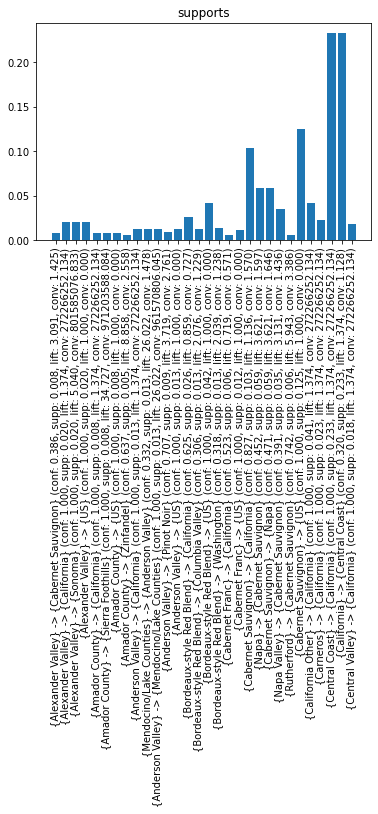

In [10]:
plt.title('supports')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(supports)), supports)
plt.show()

## 置信度

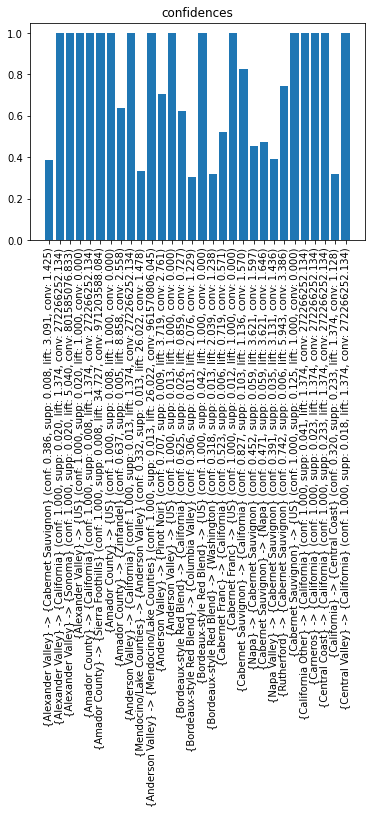

In [11]:
plt.title('confidences')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(confidences)), confidences)
plt.show()

## Lifts评价

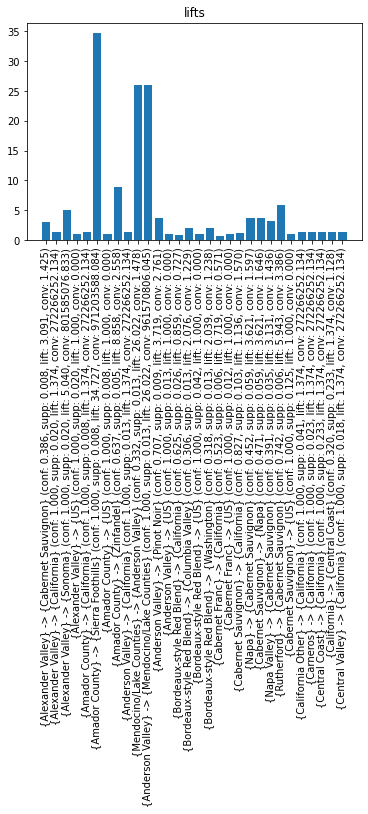

In [12]:
plt.title('lifts')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(lifts)), lifts)
plt.show()

## 卡方评价

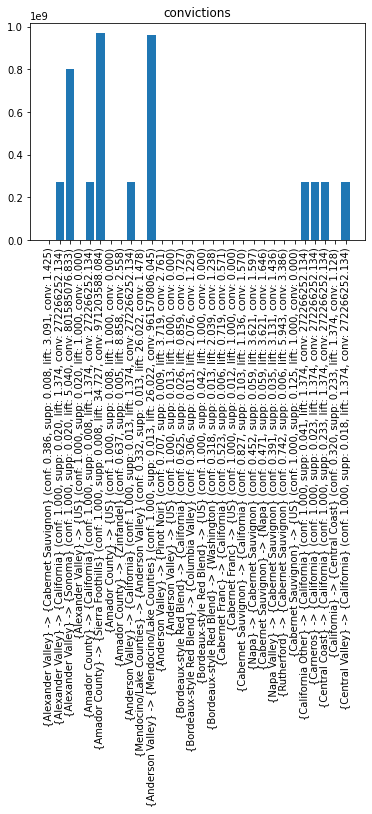

In [13]:
plt.title('convictions')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(convictions)), convictions)
plt.show()

-------

# 分析Wine Reviews数据集的winemag-data-130k-v2.csv'文件
## csv文件路径

In [14]:
csv_file_path = 'D:/Data/data_mining/1/Wine Reviews/winemag-data-130k-v2.csv'

## 读取数据，并查看前10行数据

In [15]:
data_frame = pd.read_csv(csv_file_path)
data_frame = data_frame.dropna(how='any').astype(str)
print(data_frame[:10])

   Unnamed: 0 country                                        description  \
4           4      US  Much like the regular bottling from 2012, this...   
10         10      US  Soft, supple plum envelopes an oaky structure ...   
23         23      US  This wine from the Geneseo district offers aro...   
25         25      US  Oak and earth intermingle around robust aromas...   
35         35      US  As with many of the Erath 2010 vineyard design...   
60         60      US  Syrupy and dense, this wine is jammy in plum a...   
62         62      US  The aromas are brooding, with notes of barrel ...   
64         64      US  There are intriguing touches to the nose of th...   
67         67      US  A blend of Merlot and Cabernet Franc, this win...   
71         71      US  Big oak defines this robustly dense and extrac...   

                           designation points  price    province  \
4   Vintner's Reserve Wild Child Block     87   65.0      Oregon   
10                      Mou

## 选择出标称属性对应的列

In [16]:
nominal_columns = [1, 3, 6, 7, 8, 9, 10, 12, 13]
data_frame = data_frame[[column for column in data_frame.columns[nominal_columns]]]

# 预处理成适合进行关联规则挖掘的形式

In [17]:
apriori_data = []
for _, data in data_frame.iterrows():
    apriori_data.append(data)
print(apriori_data[:10])

[country                                                  US
designation              Vintner's Reserve Wild Child Block
province                                             Oregon
region_1                                  Willamette Valley
region_2                                  Willamette Valley
taster_name                                    Paul Gregutt
taster_twitter_handle                           @paulgwine 
variety                                          Pinot Noir
winery                                         Sweet Cheeks
Name: 4, dtype: object, country                                  US
designation                  Mountain Cuvée
province                         California
region_1                        Napa Valley
region_2                               Napa
taster_name                  Virginie Boone
taster_twitter_handle               @vboone
variety                  Cabernet Sauvignon
winery                   Kirkland Signature
Name: 10, dtype: object, country       

## 设置显示的最大数目

In [18]:
max_visual_num = 30

# 频繁模式

In [19]:
item_sets, rules = apriori(apriori_data, min_support=0.005, min_confidence=0.3)
print({key: {key2: item_sets[key][key2]
             for key2 in list(item_sets[key].keys())[:max_visual_num // len(list(item_sets.keys()))]}
       for key in list(item_sets.keys())})

{1: {('US',): 22387, ('Oregon',): 3489, ('Willamette Valley',): 2603, ('Paul Gregutt',): 5989}, 2: {('@gordone_cellars', 'Amador County'): 142, ('@gordone_cellars', 'Cabernet Sauvignon'): 141, ('@gordone_cellars', 'California'): 1915, ('@gordone_cellars', 'California Other'): 467}, 3: {('@gordone_cellars', 'Amador County', 'California'): 142, ('@gordone_cellars', 'Amador County', 'Jim Gordon'): 142, ('@gordone_cellars', 'Amador County', 'Sierra Foothills'): 142, ('@gordone_cellars', 'Amador County', 'US'): 142}, 4: {('@gordone_cellars', 'Amador County', 'California', 'Jim Gordon'): 142, ('@gordone_cellars', 'Amador County', 'California', 'Sierra Foothills'): 142, ('@gordone_cellars', 'Amador County', 'California', 'US'): 142, ('@gordone_cellars', 'Amador County', 'Jim Gordon', 'Sierra Foothills'): 142}, 5: {('@gordone_cellars', 'Amador County', 'California', 'Jim Gordon', 'Sierra Foothills'): 142, ('@gordone_cellars', 'Amador County', 'California', 'Jim Gordon', 'US'): 142, ('@gordone_

# 关联规则

In [20]:
rules = rules[:max_visual_num]

## 依次显示关联规则，及其支持度、置信度、Lift评价和卡方评价

In [21]:
supports, confidences, lifts, convictions = [], [], [], []
for i, rule in enumerate(rules):
    rules[i] = str(rules[i])
    print(rule)
    # 支持度
    supports.append(rule.support)
    print('support:', supports[-1])
    # 置信度
    confidences.append(rule.confidence)
    print('confidence:', confidences[-1])
    # Lift评价
    lifts.append(rule.lift)
    print('Lift:', lifts[-1])
    # 卡方评价
    convictions.append(rule.conviction)
    print('Conviction:', convictions[-1])

{Amador County} -> {@gordone_cellars} (conf: 0.667, supp: 0.006, lift: 7.794, conv: 2.743)
support: 0.006342966900433287
confidence: 0.6666666666666666
Lift: 7.793559617058311
Conviction: 2.7433778449882515
{@gordone_cellars} -> {California} (conf: 1.000, supp: 0.086, lift: 1.735, conv: 423772725.242)
support: 0.08554071559387144
confidence: 1.0
Lift: 1.7354263565891472
Conviction: 423772725.2423281
{California Other} -> {@gordone_cellars} (conf: 0.784, supp: 0.021, lift: 9.160, conv: 4.225)
support: 0.0208603207218475
confidence: 0.7835570469798657
Lift: 9.160047838505616
Conviction: 4.224943651069659
{Central Valley} -> {@gordone_cellars} (conf: 0.572, supp: 0.015, lift: 6.691, conv: 2.139)
support: 0.015187385536248715
confidence: 0.5723905723905723
Lift: 6.6914400752520855
Conviction: 2.1385386364840486
{El Dorado} -> {@gordone_cellars} (conf: 0.709, supp: 0.007, lift: 8.285, conv: 3.140)
support: 0.006521642024389154
confidence: 0.7087378640776699
Lift: 8.285386194833837
Convictio

# 可视化
## 支持度

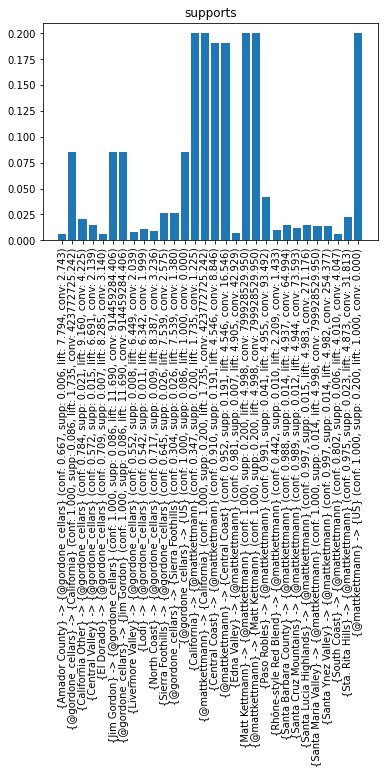

In [22]:
plt.title('supports')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(supports)), supports)
plt.show()

## 置信度

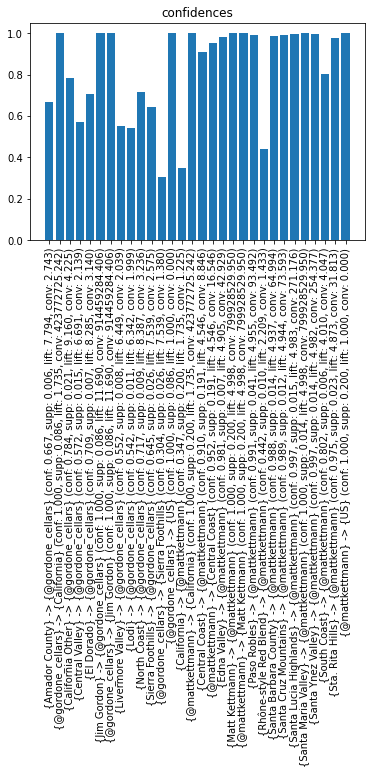

In [23]:
plt.title('confidences')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(confidences)), confidences)
plt.show()

## Lifts评价

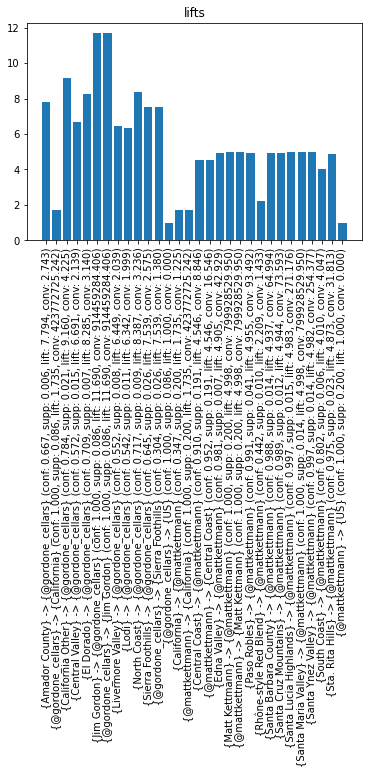

In [24]:
plt.title('lifts')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(lifts)), lifts)
plt.show()

## 卡方评价

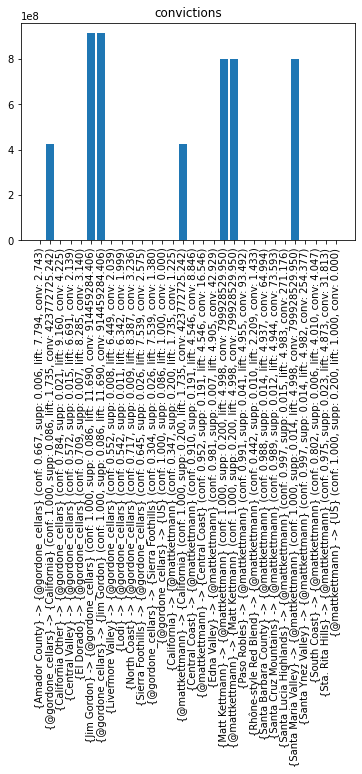

In [25]:
plt.title('convictions')
plt.xticks(range(len(rules)), rules, rotation=90)
plt.bar(range(len(convictions)), convictions)
plt.show()